In [234]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [235]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [236]:
from sklearn import preprocessing
data = pd.read_csv('/content/train_data.csv')

data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.00000,22,11628.00000,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,nan,22,30510.00000,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.00000,19,7450.00000,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.00000,19,17780.00000,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.00000,16,10404.00000,0


In [237]:
data.groupby("Holding_Policy_Duration").count()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Holding_Policy_Duration,,,,,,,,,,,,,
1,3387,3387,3387,3387,3387,3387,3387,3387,2575,3387,3387,3387,3387
10,608,608,608,608,608,608,608,608,469,608,608,608,608
11,410,410,410,410,410,410,410,410,317,410,410,410,410
12,398,398,398,398,398,398,398,398,300,398,398,398,398
13,364,364,364,364,364,364,364,364,287,364,364,364,364
14,349,349,349,349,349,349,349,349,276,349,349,349,349
14+,3238,3238,3238,3238,3238,3238,3238,3238,2481,3238,3238,3238,3238
2,3197,3197,3197,3197,3197,3197,3197,3197,2493,3197,3197,3197,3197
3,2666,2666,2666,2666,2666,2666,2666,2666,2057,2666,2666,2666,2666


In [238]:
data = data.replace("14+",15)



In [239]:
data_op_ori = pd.read_csv('/content/test_data.csv')
data_ori = pd.read_csv('/content/train_data.csv')

In [240]:
data_op = pd.read_csv('/content/test_data.csv')
data_op = data_op.replace("14+",15)

In [241]:
#profile = ProfileReport(df = data)
#profile.to_file(outputfile = 'Pre Profiling Report.html')
#print('Accomplished!')

In [242]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.00000,22,11628.00000,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,nan,22,30510.00000,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.00000,19,7450.00000,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.00000,19,17780.00000,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.00000,16,10404.00000,0


In [243]:
label_encoder = preprocessing.LabelEncoder()
data["City_Code"] = label_encoder.fit_transform(data["City_Code"])
data["Accomodation_Type"] = label_encoder.fit_transform(data["Accomodation_Type"])
data["Reco_Insurance_Type"] = label_encoder.fit_transform(data["Reco_Insurance_Type"])
data["Is_Spouse"] = label_encoder.fit_transform(data["Is_Spouse"])
data["Health Indicator"] = label_encoder.fit_transform(data["Health Indicator"])

data_op["City_Code"] = label_encoder.fit_transform(data_op["City_Code"])
data_op["Accomodation_Type"] = label_encoder.fit_transform(data_op["Accomodation_Type"])
data_op["Reco_Insurance_Type"] = label_encoder.fit_transform(data_op["Reco_Insurance_Type"])
data_op["Is_Spouse"] = label_encoder.fit_transform(data_op["Is_Spouse"])
data_op["Health Indicator"] = label_encoder.fit_transform(data_op["Health Indicator"])

In [244]:
data.describe()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,38000.00000,38000.00000,38000.00000,38000.00000,38000.00000,38000.00000,38000.00000,38000.00000,38000.00000,22919.00000,38000.00000,38000.00000,38000.00000
mean,19000.50000,15.00492,1732.99884,0.45300,0.20489,44.86021,42.72239,0.16624,3.18066,2.43239,15.11229,14181.81977,0.23863
std,10969.79945,12.15137,1425.16503,0.49779,0.40363,17.32490,17.32188,0.37230,3.41951,1.02735,6.34291,6600.18517,0.42625
min,1.00000,0.00000,1.00000,0.00000,0.00000,18.00000,16.00000,0.00000,0.00000,1.00000,1.00000,2280.00000,0.00000
25%,9500.75000,4.00000,521.00000,0.00000,0.00000,28.00000,27.00000,0.00000,0.00000,1.00000,12.00000,9226.00000,0.00000
50%,19000.50000,11.00000,1388.50000,0.00000,0.00000,44.00000,40.00000,0.00000,2.00000,3.00000,17.00000,13180.00000,0.00000
75%,28500.25000,30.00000,2675.00000,1.00000,0.00000,59.00000,57.00000,0.00000,5.00000,3.00000,20.00000,18090.00000,0.00000
max,38000.00000,35.00000,6194.00000,1.00000,1.00000,75.00000,75.00000,1.00000,9.00000,4.00000,22.00000,43350.40000,1.00000


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
ID                         38000 non-null int64
City_Code                  38000 non-null int64
Region_Code                38000 non-null int64
Accomodation_Type          38000 non-null int64
Reco_Insurance_Type        38000 non-null int64
Upper_Age                  38000 non-null int64
Lower_Age                  38000 non-null int64
Is_Spouse                  38000 non-null int64
Health Indicator           38000 non-null int64
Holding_Policy_Duration    22919 non-null object
Holding_Policy_Type        22919 non-null float64
Reco_Policy_Cat            38000 non-null int64
Reco_Policy_Premium        38000 non-null float64
Response                   38000 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 4.1+ MB


In [246]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
  
    print(); print(to_drop)


[]


In [247]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('ID', axis = 1,inplace=True)
data.drop('City_Code', axis = 1,inplace=True)
data.drop('Region_Code', axis = 1,inplace=True)
#data.drop('Accomodation_Type', axis = 1,inplace=True)
#data.drop('Upper_Age', axis = 1,inplace=True)
#data.drop('Lower_Age', axis = 1,inplace=True)
#data.drop('Is_Spouse', axis = 1,inplace=True)
#data.drop('Health Indicator', axis = 1,inplace=True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('ID', axis = 1,inplace=True)
data_op.drop('City_Code', axis = 1,inplace=True)
data_op.drop('Region_Code', axis = 1,inplace=True)
#data_op.drop('Accomodation_Type', axis = 1,inplace=True)
#data_op.drop('Upper_Age', axis = 1,inplace=True)
#data_op.drop('Lower_Age', axis = 1,inplace=True)
#data_op.drop('Is_Spouse', axis = 1,inplace=True)
#data_op.drop('Health Indicator', axis = 1,inplace=True)


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 11 columns):
Accomodation_Type          38000 non-null int64
Reco_Insurance_Type        38000 non-null int64
Upper_Age                  38000 non-null int64
Lower_Age                  38000 non-null int64
Is_Spouse                  38000 non-null int64
Health Indicator           38000 non-null int64
Holding_Policy_Duration    22919 non-null object
Holding_Policy_Type        22919 non-null float64
Reco_Policy_Cat            38000 non-null int64
Reco_Policy_Premium        38000 non-null float64
Response                   38000 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 3.2+ MB


In [249]:
data[data.columns[6]] = data[data.columns[6]].astype("float64")
data_op[data_op.columns[6]] = data_op[data_op.columns[6]].astype("float64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 11 columns):
Accomodation_Type          38000 non-null int64
Reco_Insurance_Type        38000 non-null int64
Upper_Age                  38000 non-null int64
Lower_Age                  38000 non-null int64
Is_Spouse                  38000 non-null int64
Health Indicator           38000 non-null int64
Holding_Policy_Duration    22919 non-null float64
Holding_Policy_Type        22919 non-null float64
Reco_Policy_Cat            38000 non-null int64
Reco_Policy_Premium        38000 non-null float64
Response                   38000 non-null int64
dtypes: float64(3), int64(8)
memory usage: 3.2 MB


In [250]:
data_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 10 columns):
Accomodation_Type          12882 non-null int64
Reco_Insurance_Type        12882 non-null int64
Upper_Age                  12882 non-null int64
Lower_Age                  12882 non-null int64
Is_Spouse                  12882 non-null int64
Health Indicator           12882 non-null int64
Holding_Policy_Duration    7712 non-null float64
Holding_Policy_Type        7712 non-null float64
Reco_Policy_Cat            12882 non-null int64
Reco_Policy_Premium        12882 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1006.5 KB


In [251]:


#data.dropna(inplace = True)
columns = data.columns
for each in columns:
  data.fillna(value=data[each].mean(), inplace=True)

columns = data_op.columns
for each1 in columns:
  data_op.fillna(value=data_op[each1].mean(), inplace=True)


In [252]:
x=pd.DataFrame(data)
x.drop("Response",axis =1,inplace=True)


In [253]:
x.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,0,36,36,0,0,15.00000,3.00000,22,11628.00000
1,0,1,75,22,0,1,0.45300,0.45300,22,30510.00000
2,0,0,32,32,0,9,1.00000,1.00000,19,7450.00000
3,0,1,52,48,0,0,15.00000,3.00000,19,17780.00000
4,1,0,44,44,0,1,3.00000,1.00000,16,10404.00000


In [254]:
y=data["Response"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

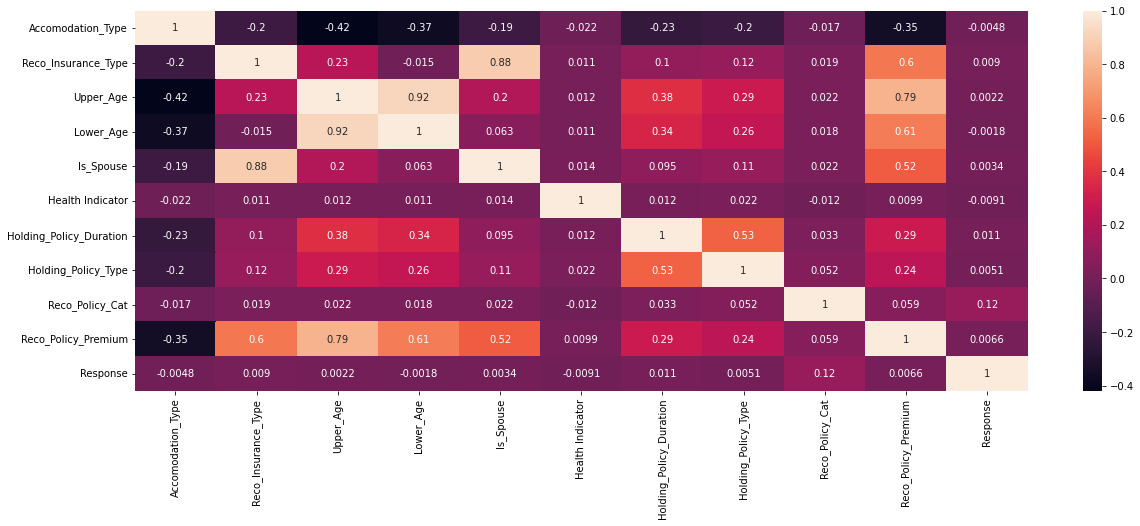

In [255]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [256]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [257]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [258]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37620, 10)
(37620,)
(380, 10)
(380,)


In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()

#param_grid = {'criterion': ['gini','entropy'],
  #               'max_depth': list(range(2,500)),
   #             'max_features': ['auto', 'sqrt', 'log2'],
    #            'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




LogisticRegression()

In [261]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [262]:
y_test_pred_op = lr.predict(x_test)


In [263]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,0
1,0


In [264]:

op = pd.DataFrame(data_op_ori["ID"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('ID')   

op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['ID', 'OP']

op.head(2)


,ID,OP
0,38001,0
1,38002,0


In [265]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [266]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [267]:
x_test.shape

(12882, 10)

In [268]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

print((r2_train) - (r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))